In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

print("jey")

import matplotlib.pyplot as plt

from sklearn import linear_model
from scipy.special import expit

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn import datasets

jey


In [2]:
# Read data -- Bereinigung

df = pd.read_excel(r'organspende_drittelesung_überarbeitet.xlsx')
df1 = df[['ja','FraktionNummer','Altersgruppe','Geschlecht', 'Bildungsgrad', 'Name']].copy()
df1.drop(df1[df1.ja > 1].index, inplace=True)
df1.drop(df1[df1.Bildungsgrad == "?"].index, inplace=True)
#   df1  =>> Bereinigtes dataframe

yes_count=0
no_count= 0
for index,row in df1.iterrows():
    if float(row[0]) == 1.0:
        yes_count += 1
    else:
        no_count+=1

print("Yes_count= {}  and no_count= {} ".format(yes_count,no_count))

Yes_count= 420  and no_count= 201 


In [5]:
# Werfe
y = df1[['ja']].copy().to_numpy()
X = df1.drop(columns=['ja','Name']).to_numpy()


#for row in y:
#   print(row)

clf = LogisticRegression(random_state=0).fit(X, y)

clf.score(X, y)
print(clf.coef_)


(621, 1)
(621, 4)
[[ 0.24467581  0.00575502  0.28938099 -0.11215457]]


e:\pyhton_verzeichnis\bib_daten\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(621, 1)
(621, 1)


<ipython-input-53-6ac7139e0523>:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 288x216 with 0 Axes>

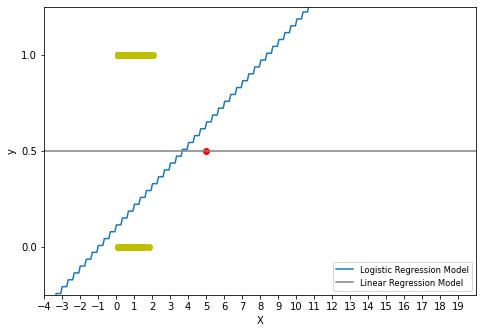

In [53]:
# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
#plt.scatter(X.ravel(), y, color='black', zorder=20)
interval = 300
X_test = np.linspace(-5, 20, interval)

#loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
#plt.plot(X_test, loss, color='red', linewidth=3)
fig=plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(5,0.5,color='r')

#  Fraktions Daten Vorbereinigung
x_sec = np.ones(len(X))*clf.intercept_
X_points =np.add(np.dot(X, np.array(clf.coef_).reshape(4,1)) , x_sec.reshape((621,1)))

print(y.shape)
print(X_points.shape)
ax.scatter(X_points,y,color='y')



Y_test = np.dot(clf.coef_,(np.dot(X_test.reshape((interval,1)),np.ones(4).reshape(1,4))).reshape((4,interval)) )+ np.ones(interval)*clf.intercept_
plt.plot(X_test,Y_test.reshape(interval,1) )
plt.axhline(.5, color='.5')
plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 20))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 20)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()



In [60]:
y = df1[['ja']].copy().to_numpy()
X = df1[['Geschlecht']].copy().to_numpy()

e:\pyhton_verzeichnis\bib_daten\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


ValueError: x and y must have same first dimension, but have shapes (300,) and (1, 300)

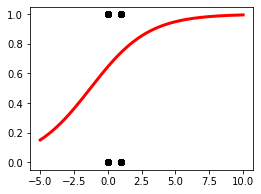

In [61]:
# Fit the classifier
clf = linear_model.LogisticRegression(C=1e5)
clf.fit(X, y)

# and plot the result
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.scatter(X.ravel(), y, color='black', zorder=20)
X_test = np.linspace(-5, 10, 300)

loss = expit(X_test * clf.coef_ + clf.intercept_).ravel()
plt.plot(X_test, loss, color='red', linewidth=3)

ols = linear_model.LinearRegression()
ols.fit(X, y)
plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
plt.axhline(.5, color='.5')

plt.ylabel('y')
plt.xlabel('X')
plt.xticks(range(-5, 10))
plt.yticks([0, 0.5, 1])
plt.ylim(-.25, 1.25)
plt.xlim(-4, 10)
plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
           loc="lower right", fontsize='small')
plt.tight_layout()
plt.show()